# Pandas Demo: Election Data

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

Matplotlib is building the font cache; this may take a moment.


## 1. Read Data from File

In [47]:
cwd = Path.cwd()
print(cwd)


/Users/ben/Documents/How_To_Videos/How_To_Python/src


How you construct file paths will depend on how you organize your project. Here I have a src folder containing this notebook, and a data folder parallel to the src folder. So my working directory ends in '/project_folder/src/pandas_election.ipynb' and I want to reference '/project_folder/data/elections.csv'

In [48]:
datafile = Path('elections.csv') #name of data file
datadir = Path('data') #name of directory (folder) containing the data
file = cwd.parent / datadir / datafile

if file.exists():
    print("Found the data file")
else:
    raise Exception("Could not find that file in that directory: ", file)

Found the data file


In [49]:
elections_df = pd.read_csv(file) #we don't need to specify a delimiter, because read_csv uses comma as a delimiter by default

### 1.1) Inspect the dataframe to make sure it looks like it was read from file correctly

In [50]:
elections_df.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [51]:
elections_df.shape

(187, 6)

In [52]:
elections_df.columns

Index(['Year', 'Candidate', 'Party', 'Popular vote', 'Result', '%'], dtype='object')

# 2. Address missing data (if any)

### Check for missing data

In [53]:
elections_df[elections_df.isna().any(axis=1)] # None of the rows contain any missing values


,Year,Candidate,Party,Popular vote,Result,%


Observation: Our elections dataset does not have any null values (NaN or None).

Note: This does not mean that our dataset is not missing any data! It is possible that entire rows are missing from the dataset.

# 3. Understand the Data

### What does each row represent?

Each row in our data set corresponds to a candidate in a presidential election in a given year.

Note: Even though the first column is 'Year', each observation is specific to a candidate.

In [54]:
elections_df.describe() #Get some statistics about the numeric columns

,Year,Popular vote,%
count,187.000000,1.870000e+02,187.000000
mean,1936.491979,1.285001e+07,27.268504
std,58.125686,1.999673e+07,23.023379
min,1824.000000,1.007150e+05,0.098088
25%,1892.000000,4.000375e+05,1.125839
50%,1936.000000,1.605943e+06,37.670670
75%,1992.000000,2.058547e+07,48.353003
max,2024.000000,8.126892e+07,61.344703


### What were all the political parties?

In [55]:
elections_df['Party'].unique()

array(['Democratic-Republican', 'Democratic', 'National Republican',
       'Anti-Masonic', 'Whig', 'Free Soil', 'Republican', 'American',
       'Constitutional Union', 'Southern Democratic',
       'Northern Democratic', 'National Union', 'Liberal Republican',
       'Greenback', 'Anti-Monopoly', 'Prohibition', 'Union Labor',
       'Populist', 'National Democratic', 'Socialist', 'Progressive',
       'Farmer–Labor', 'Communist', 'Union', 'Dixiecrat',
       "States' Rights", 'American Independent', 'Independent',
       'Libertarian', 'Citizens', 'New Alliance', 'Taxpayers',
       'Natural Law', 'Green', 'Reform', 'Constitution',
       'Libertarian Party'], dtype=object)

### Which party ran a candidate in the most elections?

In [56]:
elections_df['Party'].mode()

0    Democratic
Name: Party, dtype: object

### Exercise 1: In how many elections did the Democratic party run a candidate? What was the first election in which the Democratic party ran a candidate?

In [57]:
#Try to answer the exercise here

### What years does the data cover? Are any years missing?

(You can actually infer this from the min and max of the describe() method)

In [58]:
print("Range of Years: ", elections_df['Year'].min(), " - ", elections_df['Year'].max())

Range of Years:  1824  -  2024


In [59]:
years_in_range = range(elections_df['Year'].min(), elections_df['Year'].max()+1, 4) #An election is held every 4 years. Need the +1 because range(start, stop, step) excludes the stop 
print(years_in_range)

years_in_dataset = elections_df['Year']
missing_years = set(list(years_in_range)) - set(years_in_dataset) #Note that we're using the Python set datatype, which is like an unordered list and does not allow duplicates
print(missing_years) #There are no missing years, so it returns an empty set as set()

range(1824, 2025, 4)
set()


# 4. Ask Questions About the Data

### 4.1) Does the winner of the popular vote always win the election? Are these two columns redundant? Otherwise, when does the popular vote winner not win the election?

For each year, we need to determine the winner of the popular vote by which candidate had the largest popular vote, and then check if their result for that year is 'win' or 'loss'

In [60]:
# Group the rows by Year, then in each group find the index (row number) of the candidate who had the largest popular vote
idx = elections_df.groupby('Year')['Popular vote'].idxmax()

# Now select the rows from the original dataframe corresponding to those indices
popular_winners = elections_df.iloc[idx] #using iloc to get rows based on their numeric index positions

#Get the years in which the popular winner lost the election
popular_winners[popular_winners['Result'] == 'loss'] #using boolean indexing

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
34,1876,Samuel J. Tilden,Democratic,4288546,loss,51.528376
45,1888,Grover Cleveland,Democratic,5534488,loss,48.656799
151,2000,Al Gore,Democratic,50999897,loss,48.491813
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539


Sanity check: Are there any results in the Result column other than win and loss? Is there 'tie' or a typo or something else?

In [61]:
elections_df['Result'].unique() #Nope! Just win and loss

array(['loss', 'win'], dtype=object)

### 4.2) Has any candidate run three or more times? What about 4 or more? Which candidate ran the most times?

In [62]:
elections_df['Candidate'].value_counts() #value_counts() sorts the values by default so maximum is at the top

Candidate
Norman Thomas         5
Franklin Roosevelt    4
Eugene V. Debs        4
Ralph Nader           4
Andrew Jackson        3
                     ..
Silas C. Swallow      1
Alton B. Parker       1
John G. Woolley       1
Joshua Levering       1
Chase Oliver          1
Name: count, Length: 135, dtype: int64

### 4.3) Who were all the winning candidates (with the data from the years they won)?

In [63]:
winners = elections_df[elections_df['Result'] == 'win']

### 4.4) Which candidate has won the most elections?

In [64]:
win_counts = winners['Candidate'].value_counts() #value_counts() sorts the values by default so maximum is at the top
win_counts.head()

Candidate
Franklin Roosevelt    4
Abraham Lincoln       2
Andrew Jackson        2
Dwight Eisenhower     2
William McKinley      2
Name: count, dtype: int64

# 5. Visualize the Data

### What fraction of the vote did the winner receive in each year?

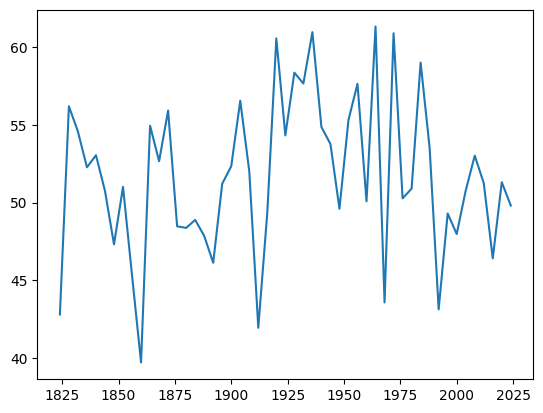

In [ ]:
plt.plot(winners['Year'], winners['%']) #plot(x_values, y_values) will give you a line plot

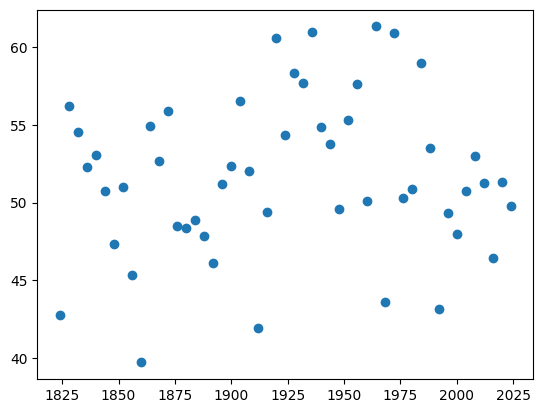

In [ ]:
plt.scatter(winners['Year'], winners['%']) #A scatter plot without the interpolation between successive years

Note: There does not appear to be any observed trend over time and no extreme outliers.

### Let's look at a histogram of the voter percentages of the winners

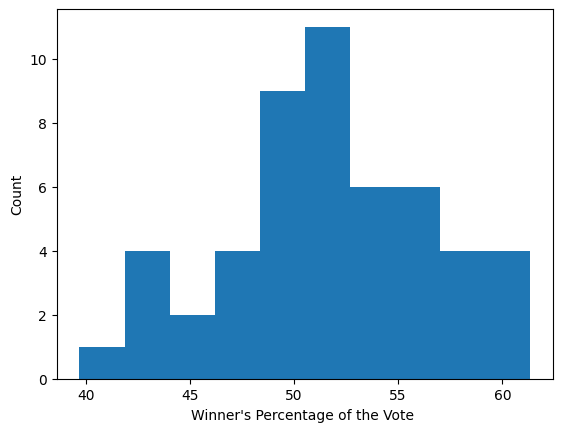

In [81]:
plt.hist(winners['%'], bins=10)
plt.xlabel('Winner\'s Percentage of the Vote ') #use backslash to escape the apostrophe
plt.ylabel('Count')
plt.show()

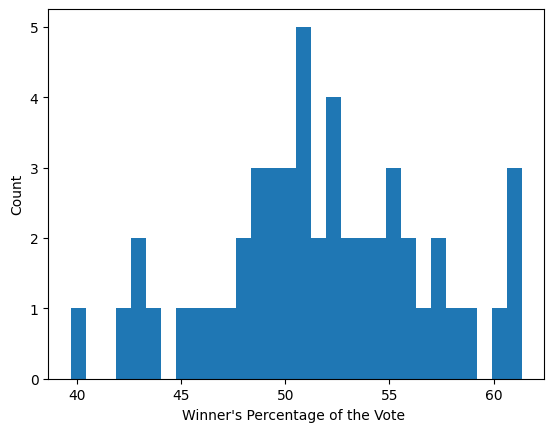

In [ ]:
plt.hist(winners['%'], bins=30) #More bins, more granular view
plt.xlabel('Winner\'s Percentage of the Vote ') #use backslash to escape the apostrophe
plt.ylabel('Count')
plt.show()